Ejercicio 2.D
Siguiendo con el DataFrame anterior:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from adjustText import adjust_text

model_metrics = pd.read_csv("tiempos_red_neuronal.csv", sep=",", index_col=0)
model_metrics.rename(columns={'talla': 'epoca'}, inplace=True)
model_metrics = model_metrics.dropna()
model_metrics.drop(columns=["desviacion"], inplace=True)
model_metrics.head()

,funcion_activacion,epoca,tiempo
0,lineal,12.0,156.885412
1,sigmoid,12.0,160.744537
2,tanh,12.0,158.876953
3,relu,12.0,161.685764
4,selu,12.0,160.904838


La gráfica no deja claro cda una de las rectas. Para mejorarlo se podría anotar al final de cada recta el nombre de la función de activación tal y como se muestra en el siguiente gráfico:
Para poner texto en una gráfica se usa el método annotate y la librería adjustText - automatic label placement for matplotlib

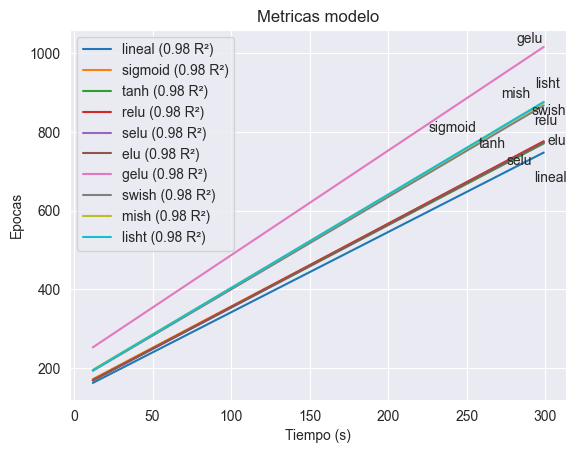

In [2]:
activation_functions = model_metrics["funcion_activacion"].unique()

texts = []

for act_fun in activation_functions:
    function_records = model_metrics[
        (model_metrics["funcion_activacion"] == act_fun)
    ]
    function_x = function_records["epoca"].to_frame()
    function_y = function_records["tiempo"].to_frame()

    model = LinearRegression()
    model.fit(function_x, function_y)

    my_df = function_records.copy()
    my_df.loc[:, "y_pred"] = model.predict(function_x)

    label = f"{act_fun} ({model.score(function_x, function_y):.2f} R²)"
    plt.plot(my_df['epoca'], my_df['y_pred'], label=label)

    x_text = my_df['epoca'].iloc[-1]
    y_text = my_df['y_pred'].iloc[-1]
    texts.append(plt.text(x_text, y_text, act_fun))

plt.xlabel('Tiempo (s)')
plt.ylabel('Epocas')
plt.title('Metricas modelo')
plt.legend()
adjust_text(texts)
plt.show()